In [2]:
# The Gray-Scott model represents the reaction and diffusion of two generic chemical species, U  and V
# whose concentration at a point in space is represented by variables u
# and v. The model follows some simple rules.
# (1) Each chemical diffuses through space at its own rate.
# (2) Species U is added at a constant feed rate into the system.
# (3) Two units of species V can 'turn' a unit of species U into V: 2V+U→3V
# (4) There's a constant kill rate removing species V
# This model results in the following system of partial differential equations for the concentrations u(x,y,t)
# and v(x,y,t) of both chemical species:
# ∂u/∂t = D_u ∇^2u − uv^2 + F(1−u)
# ∂v/∂t = D_v ∇^2v + uv^2 - (F+k)v
# The system is represented by two arrays, U and V, holding the discrete values of the concentrations u
 and v
v
, respectively. We start by setting U = 1 everywhere and V = 0 everywhere, then introduce areas of difference, as initial conditions. We then add a little noise to the whole system to help the u
u
 and v
v
 reactions along.

SyntaxError: unexpected character after line continuation character (<ipython-input-2-ca1918675918>, line 11)

In [3]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
nx = 21
ny = 21
T = numpy.ones((ny, nx))*20
T[0,:]= 100
T[:,0] = 100
j_mid = int((numpy.shape(T)[0])/2) 
i_mid = int((numpy.shape(T)[1])/2)
print(j_mid)
print(i_mid)

10
10


In [14]:
import numpy
from matplotlib import pyplot
import matplotlib.cm as cm
%matplotlib inline

In [15]:
n = 192

Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 

dh = 5/(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [16]:
uvinitial = numpy.load('uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

[ 0.92469521  0.85013834  0.66815621  0.90196481  0.9039502 ]


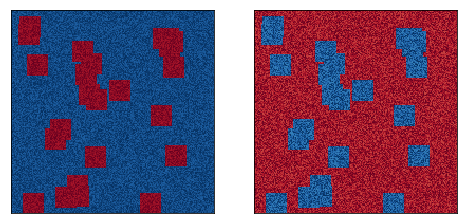

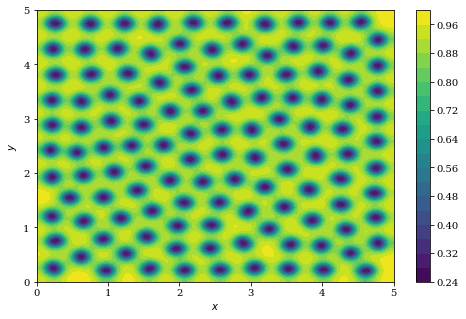

In [17]:
fig = pyplot.figure(figsize=(8,5))
pyplot.subplot(121)
pyplot.imshow(U, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);
pyplot.subplot(122)
pyplot.imshow(V, cmap = cm.RdBu)
pyplot.xticks([]), pyplot.yticks([]);

ftcs(U,V,nt, Du, Dv, dt, dh, F,k)

In [18]:
def ftcs(Um,Vm,nt, Du, Dv, dt, dh, F,k):

    
   
    for n in range(nt):
        Umn = Um.copy()
        Vmn = Vm.copy()
        
  
        
        Um[1:-1,1:-1] = Umn[1:-1,1:-1] + Du*(dt/(dh**2) * (Umn[1:-1,2:] - 2*Umn[1:-1,1:-1] + Umn[1:-1,:-2]) +\
                                             dt/(dh**2) * (Umn[2:,1:-1] - 2*Umn[1:-1,1:-1] + Umn[:-2,1:-1])) +\
                                       - dt * Umn[1:-1,1:-1] * (Vmn[1:-1,1:-1])**2 + F*(1-Um[1:-1,1:-1])*dt
        
        Vm[1:-1,1:-1] = Vmn[1:-1,1:-1] + Dv*(dt/(dh**2) * (Vmn[1:-1,2:] - 2*Vmn[1:-1,1:-1] + Vmn[1:-1,:-2]) +\
                                             dt/(dh**2) * (Vmn[2:,1:-1] - 2*Vmn[1:-1,1:-1] + Vmn[:-2,1:-1])) +\
                                       + dt * Umn[1:-1,1:-1] * (Vmn[1:-1,1:-1])**2 - (F+k)*Vmn[1:-1,1:-1]*dt
            
  
        
        # Enforce Neumann BCs for U
        Um[-1,:] = Um[-2,:]
        Um[:,-1] = Um[:,-2]
        
        Um[0,:] = Um[1,:]
        Um[:,0] = Um[:,1]
        
        # Enforce Neumann BCs for V
        Vm[-1,:] = Vm[-2,:]
        Vm[:,-1] = Vm[:,-2]
        
        Vm[0,:] = Vm[1,:]
        Vm[:,0] = Vm[:,1]
        
        
   
    print(Um[100,::40])
    nx = (5/dh)+1
    ny=nx
    x = numpy.linspace(0,5,nx)
    y = numpy.linspace(0,5,ny)
    pyplot.figure(figsize=(8,5))
    pyplot.contourf(x,y,Um,20,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar();